In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Y ban dau: ', y_train)
print('Y sau: ', Y_train)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'sigmoid'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
H = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 32, epochs = 10, verbose = 1)

(50000, 28, 28)
Y ban dau:  [5 0 4 ... 8 4 8]
Y sau:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Epoch 1/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.3228 - accuracy: 0.9142 - val_loss: 0.0710 - val_accuracy: 0.9817
Epoch 2/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.0616 - accuracy: 0.9825 - val_loss: 0.0606 - val_accuracy: 0.9825
Epoch 3/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.0390 - accuracy: 0.9885 - val_loss: 0.0425 - val_accuracy: 0.9872
Epoch 4/10
1563/1563 [==============================] - 104s 67ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0432 - val_accuracy: 0.9869
Epoch 5/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 0.0406 - val_accuracy: 0.9882
Epoch 6/10
1563/1563 [==============================] - 

In [1]:
fig = plt.figure()
numOfEpoch = 10
print(H.history)
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label = 'training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label = 'accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy|Loss')
plt.legend()
score = model.evaluate(X_test, Y_test, verbose = 0)
print(score)

NameError: name 'plt' is not defined

Gia tri du doan:  5


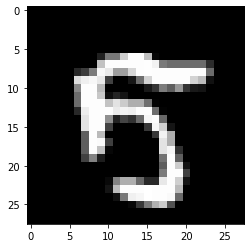

In [9]:
a = 2001

plt.imshow(X_test[a].reshape(28, 28), cmap = 'gray')
y_predict = model.predict(X_test[a].reshape(1, 28, 28, 1))
print('Gia tri du doan: ', np.argmax(y_predict))